## Código
#### **1º Definindo as funções: Malthus, Verhulst e Gompertz.**
#### **2º Exutando ambos os métodos nas três funções.**
#### **3º Plotando e comparando suas aproximações.**
*Valores fixos: h = 1; x0 = 0.5; λ = 0.1; K = 1*


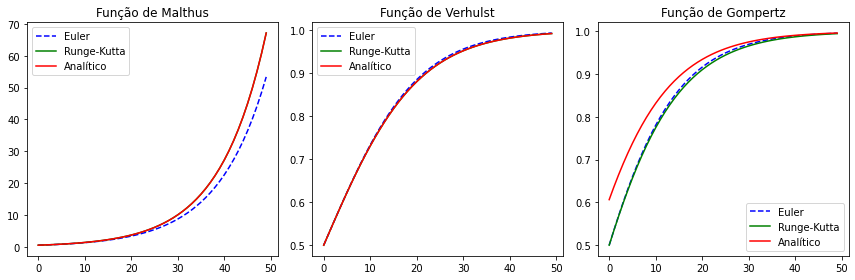

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as funções
def malthus(x, t, λ):
    return λ*x

def verhulst(x, t, λ, K):
    return λ*x*(1 - x/K)

def gompertz(x, t, λ, a):
    return λ*x*np.log(a/x)

# Definindo as aproximações com Euler e Runge-Kutta
def euler(f, x0, t, h, *args):
    x = [x0]
    for i in range(1, len(t)):
        x.append(x[i-1] + h*f(x[i-1], t[i-1], *args))
    return x

def runge_kutta(f, x0, t, h, *args):
    x = [x0]
    for i in range(1, len(t)):
        k1 = h*f(x[i-1], t[i-1], *args)
        k2 = h*f(x[i-1] + 0.5*k1, t[i-1] + 0.5*h, *args)
        k3 = h*f(x[i-1] + 0.5*k2, t[i-1] + 0.5*h, *args)
        k4 = h*f(x[i-1] + k3, t[i-1] + h, *args)
        x.append(x[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6)
    return x

# Parâmetros
h = 1
x0 = 0.5
λ = 0.1
K = 1
a = 1

# Intervalo de tempo
t = np.arange(0, 50, h)

# Aproximações com Euler e Runge-Kutta
x_malthus_euler = euler(malthus, x0, t, h, λ)
x_verhulst_euler = euler(verhulst, x0, t, h, λ, K)
x_gompertz_euler = euler(gompertz, x0, t, h, λ, a)

x_malthus_rk = runge_kutta(malthus, x0, t, h, λ)
x_verhulst_rk = runge_kutta(verhulst, x0, t, h, λ, K)
x_gompertz_rk = runge_kutta(gompertz, x0, t, h, λ, a)

# Plotando os gráficos
plt.figure(figsize=(12, 4))

# Malthus
plt.subplot(1, 3, 1)
plt.plot(t, x_malthus_euler, 'b--', label='Euler')
plt.plot(t, x_malthus_rk, 'g', label='Runge-Kutta')
plt.plot(t, x0*np.exp(λ*t), 'r', label='Analítico')
plt.legend()
plt.title('Função de Malthus')

# Verhulst
plt.subplot(1, 3, 2)
plt.plot(t, x_verhulst_euler, 'b--', label='Euler')
plt.plot(t, x_verhulst_rk, 'g', label='Runge-Kutta')
plt.plot(t, K/(1 + ((K/x0) - 1)*np.exp(-λ*t)), 'r', label='Analítico')
plt.legend()
plt.title('Função de Verhulst')

# Gompertz
plt.subplot(1, 3, 3)
plt.plot(t, x_gompertz_euler, 'b--', label='Euler')
plt.plot(t, x_gompertz_rk, 'g', label='Runge-Kutta')

# Definindo a função analítica para Gompertz
def gompertz_analytical(t, x0, λ, a):
    return a * np.exp(-np.exp(-λ * t + np.log(x0 / a)))

plt.plot(t, gompertz_analytical(t, x0, λ, a), 'r', label='Analítico')
plt.legend()
plt.title('Função de Gompertz')

plt.tight_layout()
plt.show()

### Código que calcula o erro absoluto médio para cada uma das funções em comparação ao método usado (Euler x Runge-Kutta)

In [14]:

# Cálculo do erro absoluto médio
def mean_absolute_error(approximation, analytical):
    return np.mean(np.abs(approximation - analytical))

# Cálculo do erro absoluto médio para cada método
error_euler_malthus = mean_absolute_error(x_malthus_euler, x0*np.exp(λ*t))
error_rk_malthus = mean_absolute_error(x_malthus_rk, x0*np.exp(λ*t))

error_euler_verhulst = mean_absolute_error(x_verhulst_euler, K/(1 + ((K/x0) - 1)*np.exp(-λ*t)))
error_rk_verhulst = mean_absolute_error(x_verhulst_rk, K/(1 + ((K/x0) - 1)*np.exp(-λ*t)))

error_euler_gompertz = mean_absolute_error(x_gompertz_euler, gompertz_analytical(t, x0, λ, a))
error_rk_gompertz = mean_absolute_error(x_gompertz_rk, gompertz_analytical(t, x0, λ, a))

# Imprimindo os resultados
print('Erro Absoluto Médio (Malthus) - Euler:', error_euler_malthus)
print('Erro Absoluto Médio (Malthus) - Runge-Kutta:', error_rk_malthus)
print('---')
print('Erro Absoluto Médio (Verhulst) - Euler:', error_euler_verhulst)
print('Erro Absoluto Médio (Verhulst) - Runge-Kutta:', error_rk_verhulst)
print('---')
print('Erro Absoluto Médio (Gompertz) - Euler:', error_euler_gompertz)
print('Erro Absoluto Médio (Gompertz) - Runge-Kutta:', error_rk_gompertz)


Erro Absoluto Médio (Malthus) - Euler: 2.3774472097828294
Erro Absoluto Médio (Malthus) - Runge-Kutta: 4.2808534689089405e-05
---
Erro Absoluto Médio (Verhulst) - Euler: 0.0027560868673695803
Erro Absoluto Médio (Verhulst) - Runge-Kutta: 2.985662818311141e-08
---
Erro Absoluto Médio (Gompertz) - Euler: 0.026167150929911318
Erro Absoluto Médio (Gompertz) - Runge-Kutta: 0.029905982311191036


### Conclusão: 
#### **O erro absoluto médio do método de Euler tende a ser maior, especialmente em intervalos de tempo maiores ou em problemas com taxas de variação rápidas. O método de Runge-Kutta, como o RK4, é mais preciso e apresenta um erro absoluto médio menor em relação à solução analítica. Quanto menor o erro absoluto médio, mais precisa é a aproximação numérica. Portanto, conclui-se que o método de Runge-Kutta é mais preciso e confiável que o método de Euler para o problema em questão.**